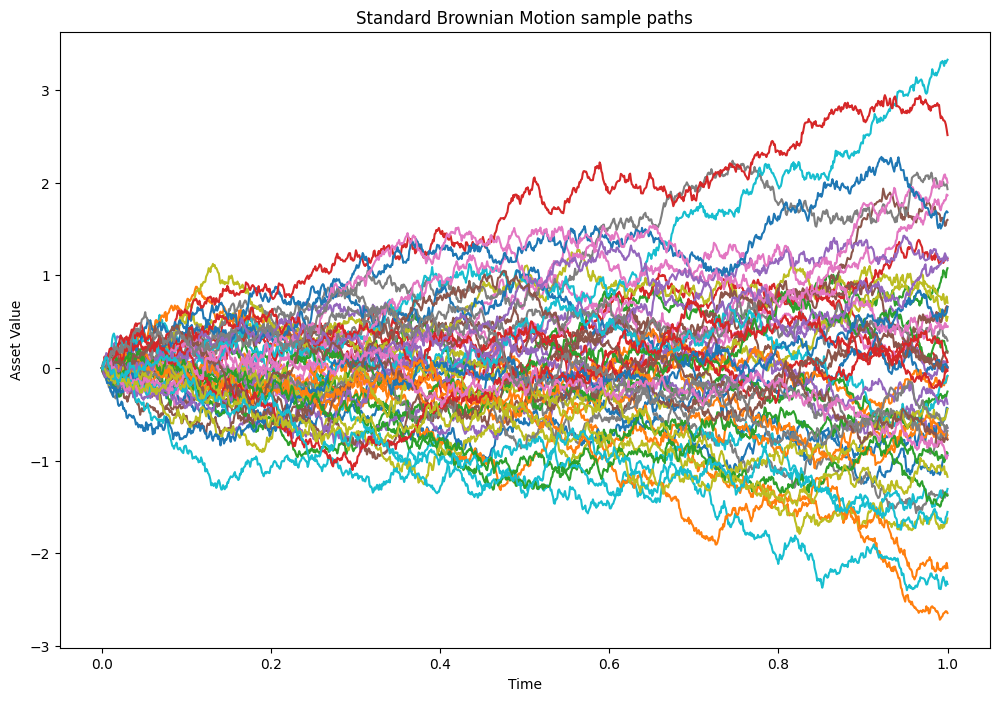

In [2]:
# Based on this article: https://www.quantstart.com/articles/brownian-motion-simulation-with-python/
# Good reference: [Glasserman, 2003] - Glasserman, P. (2003) Monte Carlo Methods in Financial Engineering, Springer.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Seed
rng = np.random.default_rng(42)

# Parameters
paths = 50
points = 1000
mu, sigma = 0.0, 1.0

Z = rng.normal(mu, sigma, (paths, points))

interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (points - 1)

t_axis = np.linspace(interval[0], interval[1], points)

W = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    W[:, real_idx] = W[:, real_idx - 1] + np.sqrt(dt) * Z[:, idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_title("Standard Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()


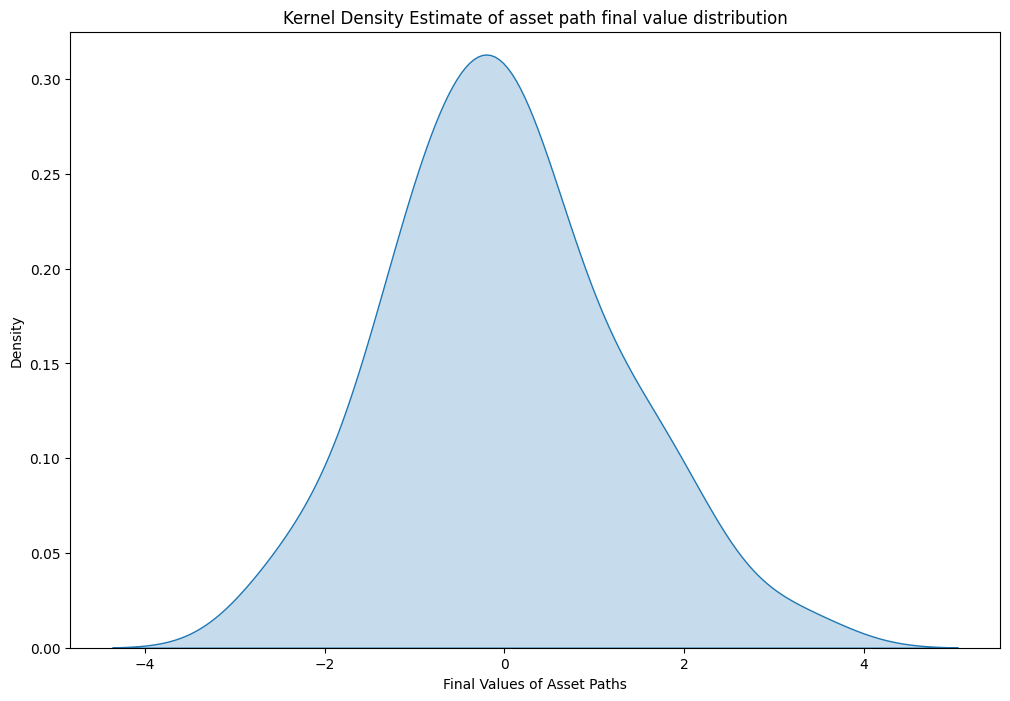

final_values   -0.011699
dtype: float64 final_values    1.251382
dtype: float64


In [4]:
# Use a Kernel Density Estimate (KDE) for estimating a (continuous) probability distribution from finite sample data

# End of paths
final_values = pd.DataFrame({'final_values': W[:, -1]})

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.kdeplot(data=final_values, x='final_values', fill=True, ax=ax)
ax.set_title("Kernel Density Estimate of asset path final value distribution")
ax.set_ylim(0.0, 0.325)
ax.set_xlabel('Final Values of Asset Paths')
plt.show()

print(final_values.mean(), final_values.std())

In [ ]:
# Constant Drift and Volatility Brownian Motion

mu_c, sigma_c = 5.0, 2.0

X = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    X[:, real_idx] = X[:, real_idx - 1] + mu_c * dt + sigma_c * np.sqrt(dt) * Z[:, idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, X[path, :])
ax.set_title("Constant mean and standard deviation Brownian Motion sample paths")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
plt.show()